In [171]:
# implement the K-mean from Scratch

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict
from sklearn.datasets.samples_generator import make_blobs


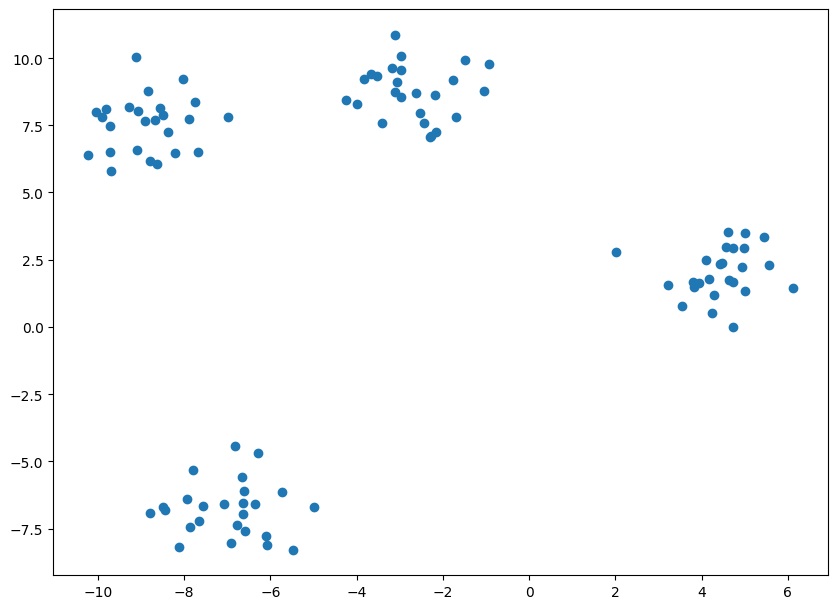

In [173]:
# generate sample data
X, y = make_blobs(n_samples=100, centers=4, random_state=42)
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.scatter(X[:, 0], X[:, 1]);

In [174]:
X[0:5, :]

array([[-9.68512147,  5.80867569],
       [-6.06610997, -8.11097391],
       [-2.97867201,  9.55684617],
       [-5.47683288, -8.28196066],
       [-8.4805404 ,  7.88430744]])

In [175]:
y

array([3, 2, 0, 2, 3, 2, 1, 1, 1, 0, 0, 2, 2, 1, 0, 3, 3, 1, 3, 3, 0, 3,
       3, 1, 1, 0, 1, 3, 3, 2, 2, 1, 2, 3, 0, 0, 0, 0, 1, 1, 3, 1, 2, 0,
       0, 2, 2, 3, 3, 1, 1, 1, 1, 2, 3, 3, 0, 0, 1, 0, 2, 1, 3, 2, 3, 3,
       2, 3, 1, 2, 1, 2, 3, 0, 2, 3, 2, 3, 2, 2, 1, 2, 0, 3, 0, 0, 0, 2,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 3, 1])

In [176]:
class kMean(object):

  def __init__(self, K):
    self.K = K  # K clusters
  

  def get_distance(self, pt1, pt2):
      # if N dimensions,  pt1: [x1, x2, ..., xN], pt2:[y1, y2,..., yN]
      return np.sum((pt1 - pt2)**2)  # or without **0.5

  # Assign input X to clusters based on the centroid
  def assign_clusters(self, X_arr, centroids, K):
    M = X_arr.shape[0]
    clusters_dict = defaultdict(list)
    for i in range(M):
      dist_list = np.zeros((K, 1))
      for j, center in enumerate(centroids):
        tmp_distance = self.get_distance(X_arr[i], center)
        #print("tmp_distance: ", dist_list.shape, tmp_distance)
        dist_list[j] = tmp_distance
      # default centroid index from 0 to K
      indx = np.argmin(dist_list)
      clusters_dict[indx].append(i)       # add each point indx i to the cluster_dictionary
    return clusters_dict

  def get_centroids(self, clusters_dict, X_arr, K):
    M = X_arr.shape[0]
    N = X_arr.shape[1]
    new_centroids = np.zeros((K, N))
    variance_each_cluster = np.zeros((K, N))  # for testing and visualization purpose
    for c, pt_indx in clusters_dict.items():
        vals = [X_arr[i] for i in pt_indx]
        cluster_mean = np.mean(vals, axis= 0)
        new_centroids[c] = cluster_mean

        cluster_var = np.var(vals - cluster_mean, axis = 0)

        variance_each_cluster[c] = cluster_var
    
    return new_centroids, variance_each_cluster


  def run_k_mean(self, X_arr):
    M = X_arr.shape[0]
    N = X_arr.shape[1]
    rand_indx = np.random.randint(0, N, self.K)
    print("rand_indx: ", rand_indx)

    centroids = np.array([X_arr[i] for i in rand_indx])   # initialize random centroid
    print("centroids: ", centroids, centroids.shape)
    ITER_NUM = 20
    prev_centroids = np.zeros((self.K, N))
    print("prev_centroids: ", prev_centroids, prev_centroids.shape)

    iter_no = 0
    epsilon = 1e-9
    while (iter_no < ITER_NUM and np.sum(prev_centroids - centroids) > epsilon):
      prev_centroid = centroids
      clusters_dict = self.assign_clusters(X_arr, centroids, self.K)
      centroids, variance_each_cluster = self.get_centroids(clusters_dict, X_arr, self.K)
      
      #print("cluster variance of each round: ", iter_no, np.mean(variance_each_cluster))
      iter_no += 1
    
    return clusters_dict


In [177]:
k = 4
M = X.shape[0]
kMeanObj = kMean(k)
clusters_dict = kMeanObj.run_k_mean(X)
clusters_dict

rand_indx:  [1 0 0 1]
centroids:  [[-6.06610997 -8.11097391]
 [-9.68512147  5.80867569]
 [-9.68512147  5.80867569]
 [-6.06610997 -8.11097391]] (4, 2)
prev_centroids:  [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] (4, 2)


defaultdict(list,
            {0: [1,
              3,
              5,
              11,
              12,
              29,
              30,
              32,
              42,
              45,
              46,
              53,
              60,
              63,
              66,
              69,
              71,
              74,
              76,
              78,
              79,
              81,
              87,
              91,
              93],
             1: [0,
              2,
              4,
              9,
              10,
              14,
              15,
              16,
              18,
              19,
              20,
              21,
              22,
              25,
              27,
              28,
              33,
              34,
              35,
              36,
              37,
              40,
              43,
              44,
              47,
              48,
              54,
              55,
              56,
          

[1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, 2]


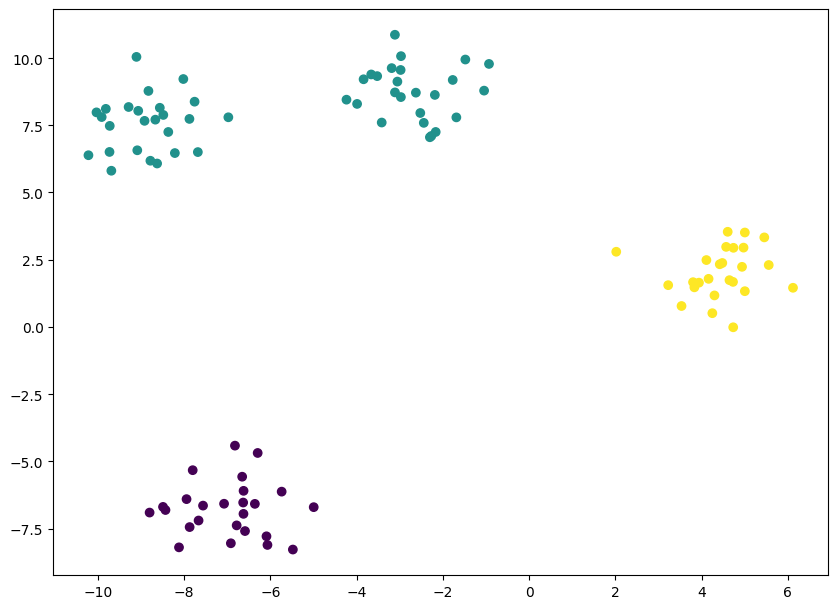

In [178]:
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})

clusters = [0] * M  # M point, each point belongs to each cluster
for c, pts_inices in clusters_dict.items():
  for indx in pts_inices:
    clusters[indx] = c

print(clusters)
plt.scatter(X[:, 0], X[:, 1], c=clusters);